In [1]:
import psycopg2
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")

In [3]:
USERNAME = "DWH_owner"
with open('start_in_ds.txt') as file:
    PASSWORD = file.read()

HOST = "ep-shiny-cake-a2v20jar.eu-central-1.aws.neon.tech"
DATABASE = "DWH"
conn_str = f'postgresql://{USERNAME}:{PASSWORD}@{HOST}/{DATABASE}?sslmode=require'
conn = psycopg2.connect(conn_str)

In [4]:
# Информация о номинальной зп по трем отраслям: Гостиницы и общепит, Финансы и страхование, Образование; уровень инфляции по годам
data = pd.read_sql_query(f'''
select * from salaries_with_inflation
''', conn)

data.head()

,Год,Гостиницы_и_общепит,Финансы_и_страхование,Образование,Годовая_инфляция
0,2000,1640.0,5232.2,1240.2,20.20
1,2001,2403.6,8885.2,1833.0,18.58
2,2002,3039.3,13245.9,2927.3,15.06
3,2003,3966.7,15561.2,3386.6,11.99
4,2004,4737.3,17383.8,4203.4,11.74


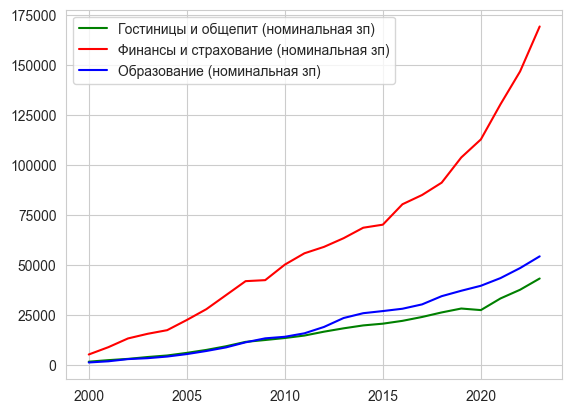

In [82]:
plt.plot(data['Год'], data['Гостиницы_и_общепит'], 'g', label='Гостиницы и общепит (номинальная зп)')
plt.plot(data['Год'], data['Финансы_и_страхование'],'r',label='Финансы и страхование (номинальная зп)')
plt.plot(data['Год'], data['Образование'], 'b', label='Образование (номинальная зп)')
plt.legend(loc='best')
plt.show()

**Темпы роста номинальной заработной платы "Гостиниц и общепита" и "Образования" практические совпадают. Темпы рост номинальной зп у "Финансов и страхования" значительно выше.**

Различия в темпах роста номинальной заработной платы между различными отраслями могут быть обусловлены несколькими факторами:

- Спрос на рабочую силу: Отрасли с высоким спросом на определенные профессии или специализации могут предлагать более высокие зарплаты для привлечения и удержания квалифицированных сотрудников.

- Уровень образования и навыков: Отрасли, требующие специальных знаний или навыков, могут предлагать более высокие зарплаты для квалифицированных работников.

- Конкуренция на рынке труда: Наличие или отсутствие конкуренции между работодателями может влиять на уровень заработной платы. 

- Экономические условия: Общее экономическое состояние и финансовые тренды могут влиять на то, какие отрасли могут позволить себе повышать заработную плату своим сотрудникам.

- Регулирование и законодательство: Нормативные акты, такие как минимальная зарплата и законы о рабочих отношениях, также могут влиять на уровень заработной платы в различных отраслях.

In [83]:
# Средние зарплаты с учетом уровня инфляции 
data['Гостиницы_и_общепит_реал'] = data['Гостиницы_и_общепит'] / (1 + data['Годовая_инфляция'] / 100)
data['Финансы_и_страхование_реал'] = data['Финансы_и_страхование'] / (1 + data['Годовая_инфляция'] / 100)
data['Образование_реал'] = data['Образование']  / (1 + data['Годовая_инфляция'] / 100)
data.head()

,Год,Гостиницы_и_общепит,Финансы_и_страхование,Образование,Годовая_инфляция,Гостиницы_и_общепит_реал,Финансы_и_страхование_реал,Образование_реал
0,2000,1640.0,5232.2,1240.2,20.20,1364.392679,4352.911814,1031.780366
1,2001,2403.6,8885.2,1833.0,18.58,2026.986001,7493.000506,1545.791870
2,2002,3039.3,13245.9,2927.3,15.06,2641.491396,11512.167565,2544.150878
3,2003,3966.7,15561.2,3386.6,11.99,3542.012680,13895.169212,3024.020002
4,2004,4737.3,17383.8,4203.4,11.74,4239.574011,15557.365312,3761.768391


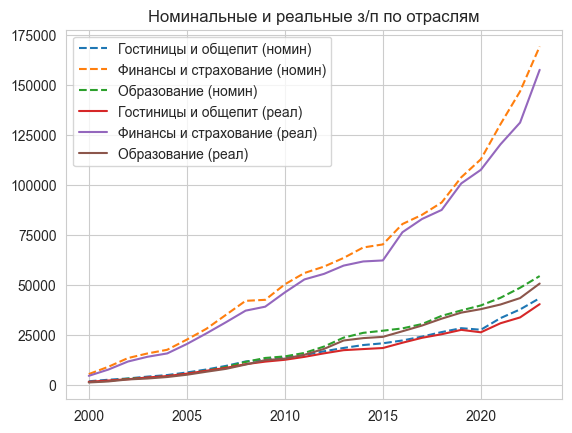

In [86]:
plt.plot(data['Год'], data['Гостиницы_и_общепит'], '--', label='Гостиницы и общепит (номин)')
plt.plot(data['Год'], data['Финансы_и_страхование'],'--',label='Финансы и страхование (номин)')
plt.plot(data['Год'], data['Образование'], '--', label='Образование (номин)')
plt.plot(data['Год'], data['Гостиницы_и_общепит_реал'], label='Гостиницы и общепит (реал)')
plt.plot(data['Год'], data['Финансы_и_страхование_реал'], label='Финансы и страхование (реал)')
plt.plot(data['Год'], data['Образование_реал'], label='Образование (реал)')
plt.legend(loc='best')
plt.title('Номинальные и реальные з/п по отраслям')
plt.show()

In [87]:
# как влияет инфляция на изменение зарплаты по сравнению с предыдущим годом
prev_year = data[['Гостиницы_и_общепит_реал', 'Финансы_и_страхование_реал', 'Образование_реал']].shift(1).rename(columns={
    'Гостиницы_и_общепит_реал': 'Гостиницы_и_общепит_пред_год', 
    'Финансы_и_страхование_реал': 'Финансы_и_страхование_пред_год', 
    'Образование_реал': 'Образование_пред_год'
})

prev_year.head(3)

,Гостиницы_и_общепит_пред_год,Финансы_и_страхование_пред_год,Образование_пред_год
0,NaN,NaN,NaN
1,1364.392679,4352.911814,1031.780366
2,2026.986001,7493.000506,1545.791870


In [88]:
df = pd.concat([data, prev_year], axis=1)
df['Гостиницы_и_общепит_прирост'] = (df['Гостиницы_и_общепит_реал'] / df['Гостиницы_и_общепит_пред_год'] - 1) * 100
df['Финансы_и_страхование_прирост'] = (df['Финансы_и_страхование_реал'] / df['Финансы_и_страхование_пред_год'] - 1) * 100
df['Образование_прирост'] = (df['Образование_реал'] / df['Образование_пред_год'] - 1) * 100
df.head()

,Год,Гостиницы_и_общепит,Финансы_и_страхование,Образование,Годовая_инфляция,Гостиницы_и_общепит_реал,Финансы_и_страхование_реал,Образование_реал,Гостиницы_и_общепит_пред_год,Финансы_и_страхование_пред_год,Образование_пред_год,Гостиницы_и_общепит_прирост,Финансы_и_страхование_прирост,Образование_прирост
0,2000,1640.0,5232.2,1240.2,20.20,1364.392679,4352.911814,1031.780366,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,2403.6,8885.2,1833.0,18.58,2026.986001,7493.000506,1545.791870,1364.392679,4352.911814,1031.780366,48.563242,72.137659,49.817919
2,2002,3039.3,13245.9,2927.3,15.06,2641.491396,11512.167565,2544.150878,2026.986001,7493.000506,1545.791870,30.316213,53.638954,64.585603
3,2003,3966.7,15561.2,3386.6,11.99,3542.012680,13895.169212,3024.020002,2641.491396,11512.167565,2544.150878,34.091396,20.699852,18.861661
4,2004,4737.3,17383.8,4203.4,11.74,4239.574011,15557.365312,3761.768391,3542.012680,13895.169212,3024.020002,19.693925,11.962403,24.396280


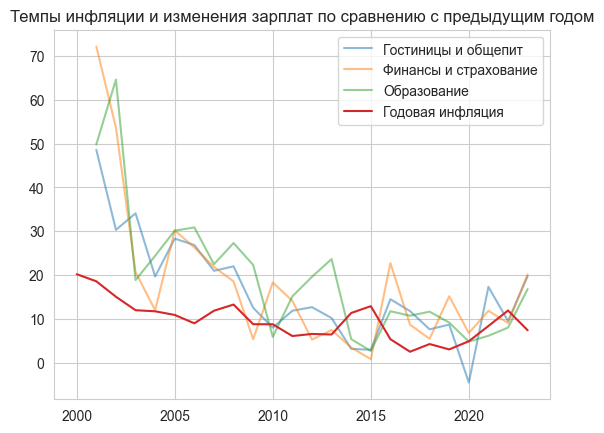

In [92]:
plt.plot(df['Год'], df['Гостиницы_и_общепит_прирост'], label='Гостиницы и общепит', alpha=0.5)
plt.plot(df['Год'], df['Финансы_и_страхование_прирост'],label='Финансы и страхование', alpha=0.5)
plt.plot(df['Год'], df['Образование_прирост'], label='Образование', alpha=0.5)
plt.plot(df['Год'], df['Годовая_инфляция'], label='Годовая инфляция')
plt.legend(loc='best')
plt.title('Темпы инфляции и изменения зарплат по сравнению с предыдущим годом')
plt.show()

**В среднем темпы изменения зарплат по данным отраслям обгоняют темпы инфляции, но наблюдаются "кризисные" годы, когда эта тенденция нарушается: 2008, 2014 и т.д.**

# Корреляции

In [93]:
data[['Годовая_инфляция', 'Гостиницы_и_общепит_реал',
       'Финансы_и_страхование_реал', 'Образование_реал']].corr()

,Годовая_инфляция,Гостиницы_и_общепит_реал,Финансы_и_страхование_реал,Образование_реал
Годовая_инфляция,1.000000,-0.623030,-0.596217,-0.612248
Гостиницы_и_общепит_реал,-0.623030,1.000000,0.995621,0.995397
Финансы_и_страхование_реал,-0.596217,0.995621,1.000000,0.991980
Образование_реал,-0.612248,0.995397,0.991980,1.000000


<AxesSubplot:>

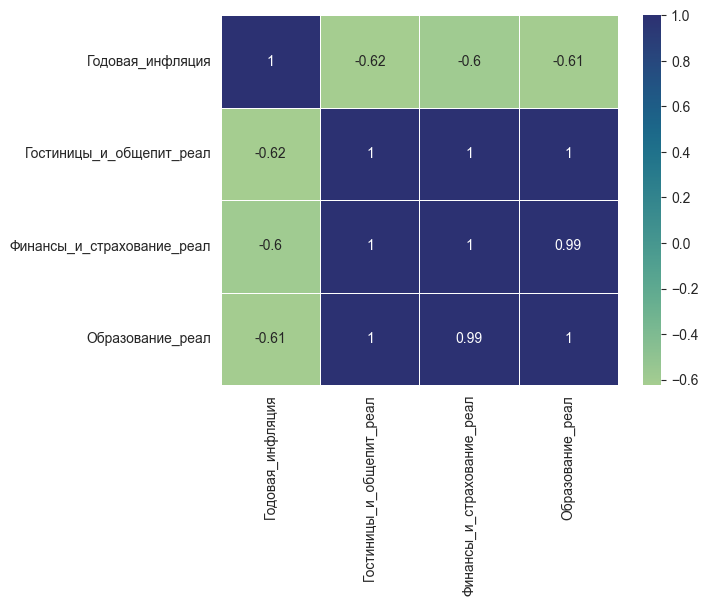

In [98]:
sns.heatmap(data[['Годовая_инфляция', 'Гостиницы_и_общепит_реал',
       'Финансы_и_страхование_реал', 'Образование_реал']].corr(), annot=True, linewidth=.5, cmap='crest')

### Корреляция с другими показателями экономики

In [102]:
extra_metrics = pd.read_sql_query(f'''
select * from extra_metrics
''', conn)

extra_metrics.head()

,Год,ВВП_на_душу_населения,Доля_занятых_лиц_в_общей_численнос,Уровень_безработицы,Доля_заработной_платы_в_ВВП,Уровень_счастья
0,2000,49834.930,NaN,NaN,NaN,NaN
1,2001,61267.273,54.200000,8.900000,43.0,NaN
2,2002,74535.790,60.200000,7.900000,46.8,NaN
3,2003,91312.550,59.381600,8.209909,47.1,NaN
4,2004,118189.130,60.333443,7.763328,46.1,NaN


<AxesSubplot:>

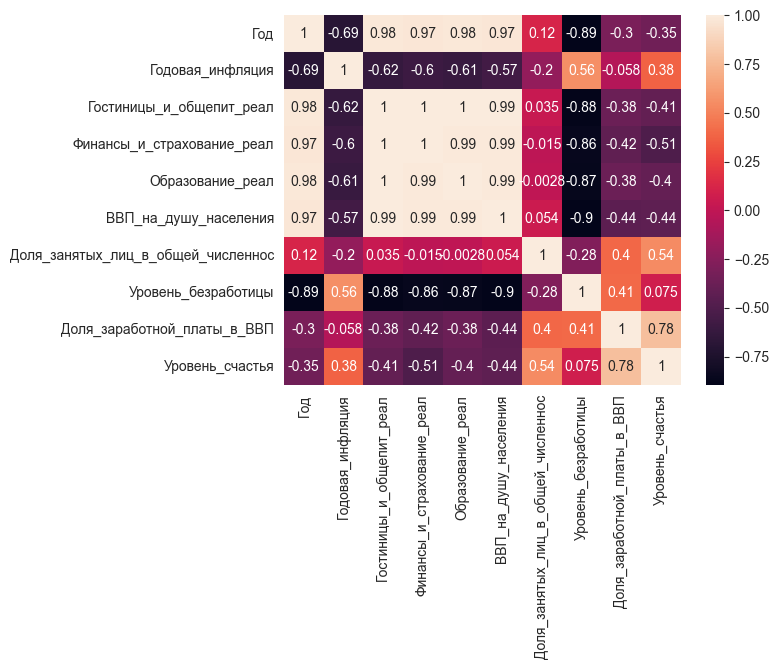

In [114]:
sns.heatmap(data[['Год', 'Годовая_инфляция', 'Гостиницы_и_общепит_реал',
       'Финансы_и_страхование_реал', 'Образование_реал']].merge(extra_metrics).corr(), annot=True)

In [34]:
# достать информацию по инфляции

# import requests
# import pandas as pd

# url = 'https://xn----ctbjnaatncev9av3a8f8b.xn--p1ai/%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B-%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8'
# html = requests.get(url).content
# df_list = pd.read_html(html)
# inflation = df_list[-1]
# inflation = inflation[['Год', 'Всего']]
# inflation = inflation[(inflation['Год'] >= 2000) & (inflation['Год'] <= 2023)]
# inflation.columns = ['Год', 'Годовая инфляция']
# inflation.head()